<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bank Marketing
##Classifying unbalanced datasets

###We will use ["Bank Marketing"](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) dataset from UCI. It is about a marketing campaing of Portuguese banking institution aiming to sell term deposits.
Dataset citation: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

###First we download the data from UCI

In [0]:
#Load data set
!wget --quiet -P  / https://raw.githubusercontent.com/dpanagop/ML_and_AI_examples/master/data/bank-additional-full_test.csv

###Then we load the necessary libraries

In [0]:
#load libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

###and store the data into a variable named dat

In [0]:
dat=pd.read_csv("bank-additional-full_test.csv",sep=';', error_bad_lines=False)

###The first rows of the dataset are displayed below

In [0]:
dat.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


###and the column names are

In [0]:
dat.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

###The columns contain information on contacted customers by the marketing campaign as well as the outcome of the communication. The columns are:  
- age: the age of the customer,
- job: the occupation of the customer,
- marital: the marital status of the customer,
- education: the educational level of the customer,
- default: a flag indicating whether the customer has credit in default,
- housing: a flag indicating whether the customer has a housing loan or not,
- loan: a flag indicating whether the customer has a personal loan or not,
- contact: the way the customer has being contacted with two possible values "cellular" and "telephone" (land line phone),
- month: month of last communication with the customer for this campaign,
- day: day of last communication with the customer for this campaign,
- duration: duration of of last communication with the customer for this campaign,
- campaing: number of contacts for this campaign and for the specific customer,
- previous: number of contacts with the customer before current campaign (-1 fo no contact)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success'),
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y: the outcome of the campaign for this customer
###To make things simpler we will drop emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed. We will also drop duration of last call since it is not known before the comunication with the customer has ended and the outcome of the campaign is known.

In [0]:
dat = dat.drop([ 'duration','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], 1)

In [0]:
dat.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'], dtype=object)

###We can see that in most cases the campaing was not successful. I.e. only 11,26% of the customers singed up for a term deposit account

In [0]:
dat['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [0]:
dat['y'].value_counts()/dat['y'].count()

no     0.887346
yes    0.112654
Name: y, dtype: float64

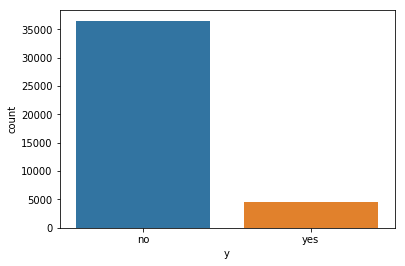

In [0]:
sns.countplot(x='y',data=dat)

###The following table presents the basic stats for the numeric variables

In [0]:
dat.describe()

,age,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963
std,10.42125,2.770014,186.910907,0.494901
min,17.00000,1.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000


In [0]:
dat.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

###In order to create a classification model, we will convert categorical, discrete variables into numeric variables.

In [0]:
cat_columns = dat.select_dtypes(['object']).columns
dat[cat_columns] = dat[cat_columns].apply(lambda x: x.astype('category'))
dat[cat_columns] = dat[cat_columns].apply(lambda x: x.cat.codes)
dat.dtypes

age            int64
job             int8
marital         int8
education       int8
default         int8
housing         int8
loan            int8
contact         int8
month           int8
day_of_week     int8
campaign       int64
pdays          int64
previous       int64
poutcome        int8
y               int8
dtype: object

###Then we will split the dataset in two subsets/parts:
- a train subset that will be used for creating a classification model,
- a test subset for evaluating the model we created

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('y',1) , dat['y'], test_size=0.3, random_state=0)

## Model creation 
###The model we will create, will be a logistic regression model.
###The following code creates the model and displays it's accuracy.

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.90


###We can create a confussion matrix displaying the real and predicted outcome for the test test.
We see that:
- 10.808 customers were classified correctly as not having signed up for a term deposit account,
- 161 customers were classified wrongly as having signed up for a term deposit account,
- 1.128 customers were classified wrongly as not having signed up for a term deposit account,
- 260 customers were classified correctly as having signed up for a term deposit account.

In [0]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10808   161]
 [ 1128   260]]


By dividing with the total number of customers in the test set, we get the following percentages
Another way to see it is that:
- 87,46% of the customers were classified correctly as not having signed up for a term deposit account,
- 1,3% of the customers were classified wrongly as having signed up for a term deposit account,
- 9,12% of the customers were classified wrongly as not having signed up for a term deposit account,
- 2,1% of the customers were classified correctly as having signed up for a term deposit account.

In [0]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix=conf_matrix/y_test.size
print(conf_matrix)

[[0.87464595 0.01302905]
 [0.09128429 0.02104071]]


Hence, model's accuracy is:

In [0]:
(conf_matrix[0,0]+conf_matrix[1,1])

0.8956866553370559

Another way to see it is by examining the prediction accuracy for each outcome. Seen in this way we see that:
- 98,53% of the customers that did not set up a term deposit account were classified correctly while on the other hand,
- 18,73% of the customers that did set up a term deposit account were classified correctly

In [0]:
conf_matrix = confusion_matrix(y_test, y_pred)
categories_size=np.array([10969,1388])
conf_matrix=conf_matrix/categories_size[:,None]
print(conf_matrix)

[[0.98532227 0.01467773]
 [0.81268012 0.18731988]]


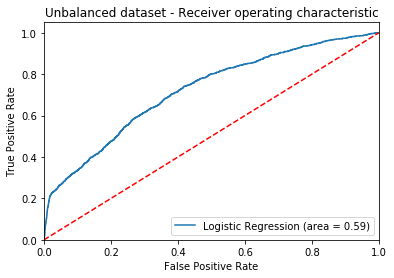

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
y_pred_prob=logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unbalanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###From what we have seen above the performance of the model is worse for the cases that the actual result is the customer setting up a term deposit account.
###This is because the highly unbalnce in the distribution of the two possible outcomes.

In [0]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_X_train,os_y_train=os.fit_sample(X_train, y_train)
os_X_train = pd.DataFrame(data=os_X_train,columns=X_train.columns )
os_y_train= pd.DataFrame(data=os_y_train,columns=['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
logreg = LogisticRegression()
logreg.fit(os_X_train, os_y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.66


In [0]:
conf_matrix = confusion_matrix(y_test, y_pred)
categories_size=np.array([10969,1388])
conf_matrix=conf_matrix/categories_size[:,None]
print(conf_matrix)

[[0.67599599 0.32400401]
 [0.44164265 0.55835735]]


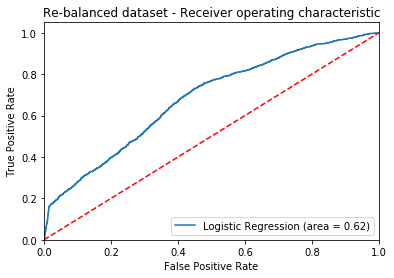

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
y_pred_prob=logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Re-balanced dataset - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()